In [ ]:
#This installation line is for Jupyter notebook environment.
#!pip install -q scikit-learn pandas matplotlib


In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [39]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip -o smsspamcollection.zip

df = pd.read_csv("SMSSpamCollection", sep="\t", header=None, names=["label", "message"])

df.head()


Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["message"])
y = df["label"]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [44]:
preds = model.predict(X_test)

✅ Evaluation Metrics
Accuracy : 0.979372197309417
Precision: 1.0
Recall   : 0.8456375838926175
F1-score : 0.9163636363636364

Detailed Report:

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



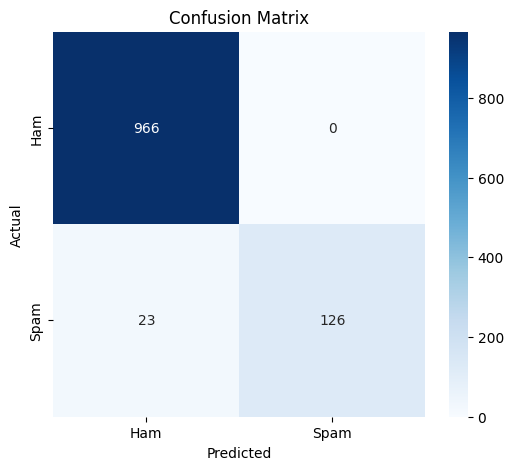

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

# 🔹 Predictions on test set
y_pred = model.predict(X_test)

# 🔹 Accuracy, Precision, Recall, F1
print("✅ Evaluation Metrics")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label="spam"))
print("Recall   :", recall_score(y_test, y_pred, pos_label="spam"))
print("F1-score :", f1_score(y_test, y_pred, pos_label="spam"))

# 🔹 Classification Report
print("\nDetailed Report:\n")
print(classification_report(y_test, y_pred, target_names=["ham", "spam"]))

# 🔹 Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["ham", "spam"])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

